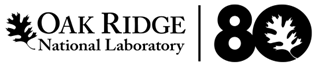

## Quantum Natural Language Processing Workflow on HPC+QC

### Speakers:
### <b> Mayanka Chandra Shekar </b>
#### Research Scientist

### <b> John Gounley </b>
#### Group Lead | Computation Scientist

#### Advanced Computing for Health Sciences
#### Oak Ridge National Laboratory



## Introduction to Natural Language Processing


1. NLP Datasets – IMDB
2.  NLP Basics

  a.  Tokenization

  b.  Stop word removal.

  c.  Stemming/Lemmatization

  d.  Parts of Speech Tagging – (DisCoCat Grammar)

3.  Feature Vector Generation and Dimensionality Reduction
    –Preparing for ML Models
  
  a. Dimensionality Based on Vocabulary Size

  b. Semantic Reduction (Word Based) - Term Frequency-Inverse Document Frequency
  
  c. Doc2Vec Embedding

4.  Classical Model – CNN

  a. CNN Model for Classifying





In [1]:
#Environment Setup

import os, sys
#from google.colab import drive
#drive.mount('/content/mnt')
#nb_path = '/content/notebooks'
#os.symlink('/content/mnt/My Drive/Colab Notebooks/QNLP-Tutorial/Environment', nb_path)
#sys.path.insert(0, nb_path)

# call this one time only
!pip install scikit-learn
!pip install nltk
# later just import it
import sklearn


# <b> NLP Datasets </b>

## <u> IMDB - Movie Review Dataset </u>

Dataset Link: https://ai.stanford.edu/~amaas/data/sentiment/

Dataset in CSV Form: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Labels: 2 (Positive, Negative)

Number of Reviews: 50,000

##  <b> Other Datasets that will be discussed in the tutorial </b>

## <u> Lambeq's MC Dataset </u>

Dataset Link: https://github.com/CQCL/lambeq/tree/main/docs/examples/datasets

Labels: 2 (food, IT)

Number of sentences: 130

## <u> Madelon Dataset</u>

Dataset Link: https://archive.ics.uci.edu/dataset/171/madelon

Labels: 2 (+1, -1)

Number of instances: 4400


In [2]:
import pandas as pd

# df = pd.read_csv('mnt/MyDrive/Colab Notebooks/QNLP-Tutorial/Dataset/IMDB Dataset.csv')
df = pd.read_csv('IMDB Dataset.csv')
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

# Stopwords Removal


Stop word removal is one of the most commonly used preprocessing steps across different NLP applications. The idea is simply removing the words that occur commonly across all the documents in the corpus. Typically, articles and pronouns are generally classified as stop words.

<u> <b> Stop word list </b> </u>

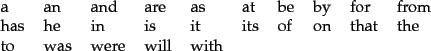


Reference: https://nlp.stanford.edu/IR-book/html/htmledition/dropping-common-terms-stop-words-1.html




# Stemming

Stemming is a text preprocessing technique used in natural language processing (NLP) to reduce words to their root or base form. The goal of stemming is to simplify and standardize words, which helps improve the performance of information retrieval, text classification, and other NLP tasks.

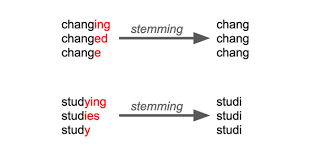




# Tokenization

Tokenization is breaking a sentence or paragraph into chunks called tokens. These tokens may be words, characters, or parts of words. By tokenizing text, NLP algorithms can operate on smaller and more meaningful units. This enables more accurate analysis, modeling, and understanding of textual data.

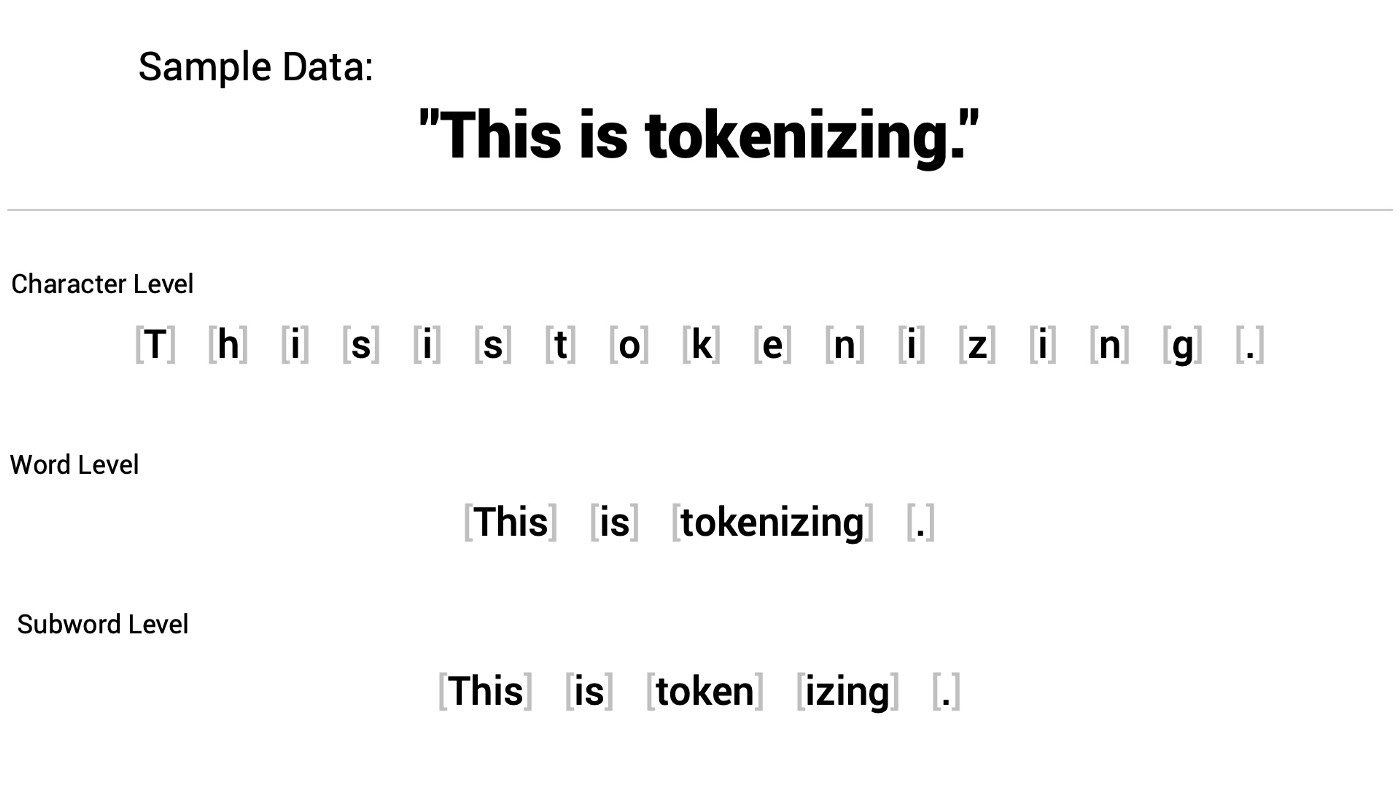

In [3]:
import nltk
from string import punctuation
from tqdm import tqdm

nltk.download('stopwords')
nltk.download('punkt')

# Stopwords
stopwords = set(nltk.corpus.stopwords.words('english')).union(list(punctuation))

#Porter Stemming
porter = nltk.stem.porter.PorterStemmer()

#Sampling IMDB
df=df.sample(100).reset_index()
df["tokens_list"] = None


#Tokenization
all_tokens = set()
for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    sentences = nltk.sent_tokenize(row["review"])
    per_sentence_tokens = []
    for sentence in sentences:
        tokens = nltk.word_tokenize(sentence)
        tokens = [token.lower() for token in tokens if token not in stopwords and token.isalpha()]
        tokens_stemmed = [porter.stem(token) for token in tokens]
        all_tokens = all_tokens.union(set(tokens_stemmed))
        per_sentence_tokens.append(tokens_stemmed)
    df.at[index, "tokens_list"] = per_sentence_tokens


df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\93t\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\93t\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 92.51it/s]


,index,review,sentiment,tokens_list
0,2620,"Los Angeles, 1976. Indie film brat John Carpen...",negative,"[[lo, angel], [indi, film, brat, john, carpent..."
1,43130,"Chayanne is beautiful enough, Vanessa is beaut...",negative,"[[chayann, beauti, enough, vanessa, beauti, en..."
2,7215,I recently watched Caprica again and thought I...,positive,"[[i, recent, watch, caprica, thought, i, might..."
3,24610,"A series of vignettes, most of them spoofing t...",positive,"[[a, seri, vignett, spoof, televis, also, dig,..."
4,47256,Great fun. I went with 8 friends to a sneak pr...,positive,"[[great, fun], [i, went, friend, sneak, previe..."


## Parts of speech tags

Part-of-speech (POS) tagging is a popular Natural Language Processing process which refers to categorizing words in a text (corpus) in correspondence with a particular part of speech, depending on the definition of the word and its context.

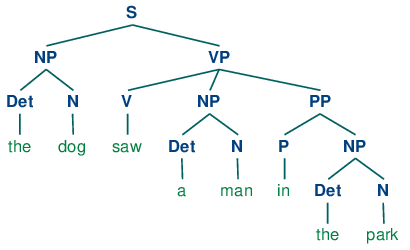

In [4]:
import os
import nltk
from IPython.display import Image
nltk.download('averaged_perceptron_tagger')

text="The dog saw a man in the park "
tokens = nltk.word_tokenize(text)
print(tokens)
tag = nltk.pos_tag(tokens)
print(tag)
grammar = "NP: {<DT>?<JJ>*<NN>}"
cp  =nltk.RegexpParser(grammar)
result = cp.parse(tag)
print(result)
# result.draw()

['The', 'dog', 'saw', 'a', 'man', 'in', 'the', 'park']
[('The', 'DT'), ('dog', 'NN'), ('saw', 'VBD'), ('a', 'DT'), ('man', 'NN'), ('in', 'IN'), ('the', 'DT'), ('park', 'NN')]
(S
  (NP The/DT dog/NN)
  saw/VBD
  (NP a/DT man/NN)
  in/IN
  (NP the/DT park/NN))


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\93t\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Feature Vector Generation

## TFIDF - Term Frequency & Inverse Document Frequency



Term frequency–Inverse document frequency, is a measure of importance of a word to a document in a collection or corpus, adjusted for the fact that some words appear more frequently in general.



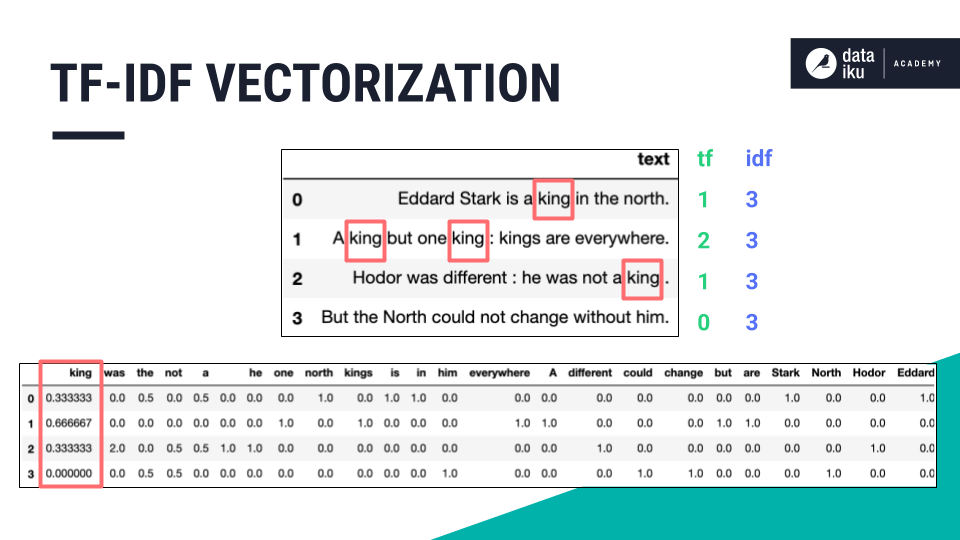





## One hot feature vector

One hot encoding creates new (binary) columns, indicating the presence of each possible value from the original data.

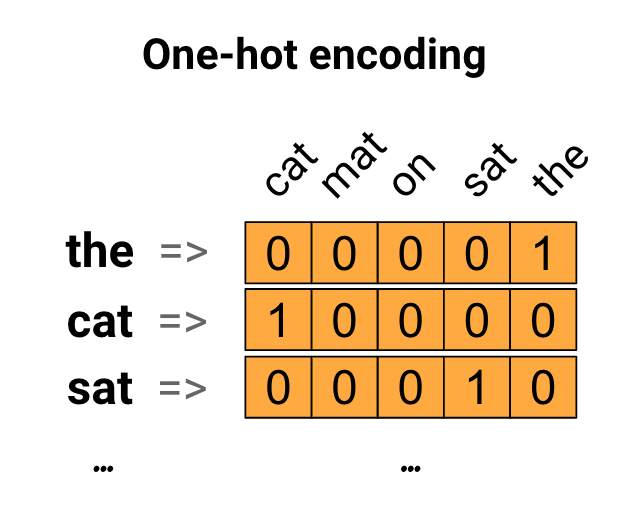





## Document2Vector Embedding


Doc2Vec is also called a Paragraph Vector a popular technique in Natural Language Processing that enables the representation of documents as vectors. This technique was introduced as an extension to Word2Vec, which is an approach to represent words as numerical vectors.

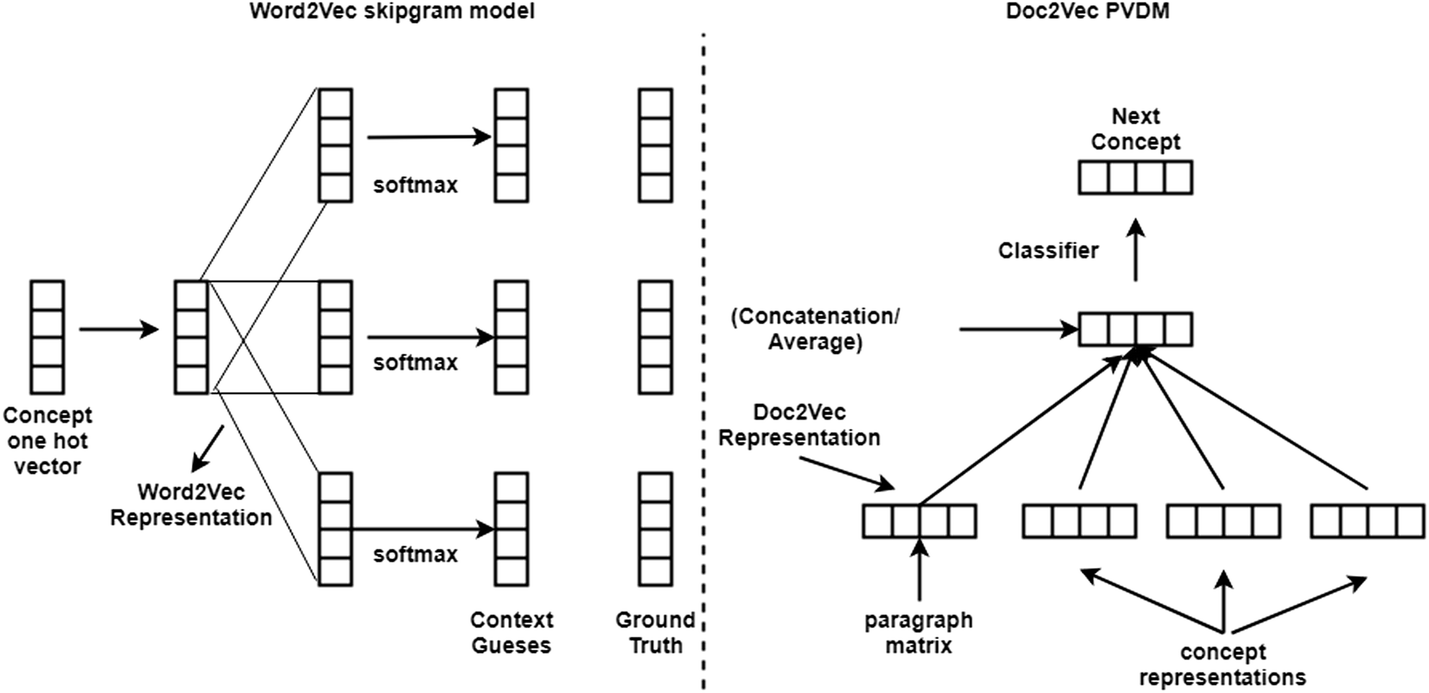

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import gensim

from tqdm import tqdm

tqdm.pandas()


# Sample Structure of Corpus Dataset
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]


def tagged_document(list_of_list_of_words):
    for i, list_of_words in enumerate(list_of_list_of_words):
        yield gensim.models.doc2vec.TaggedDocument(list_of_words, [i])


def doc2vecStr(d):
    dd = model.infer_vector(d.split(' '))
    return dd

#TFIDF
df = pd.read_csv('./IMDB Dataset.csv')
#Sampling for convience
#df=df.head(100)

corpus = df['review']
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=0.2, max_features=None, sublinear_tf=True,
                             token_pattern=r"(?u)\b[A-Za-z][A-Za-z]+\b")
X = vectorizer.fit_transform(corpus)



def top3features(c):
    transformdoc = vectorizer.transform([c])
    feature_array = np.array(vectorizer.get_feature_names_out())
    # print(feature_array)
    tfidf_sorting = np.argsort(transformdoc.toarray()).flatten()[::-1]
    n = 5
    top_n = feature_array[tfidf_sorting][:n]
    top_n_str = " ".join(top_n)
    return top_n_str #+ " ."


df['top20Text'] = df['review'].apply(lambda c: top3features(c))

df['sentiment'] = df['sentiment'].apply(lambda d: 1 if d == "positive" else 0)

data = [d.lower() for d in df['top20Text']]

#Doc2Vec Embedding
data_for_training = list(tagged_document(data))
model = gensim.models.doc2vec.Doc2Vec(vector_size=10, min_count=2, epochs=30)
model.build_vocab(data_for_training)
model.train(data_for_training, total_examples=model.corpus_count, epochs=model.epochs)
# model.save('word2vecModel_imdb')

df['doc2vec'] = df['top20Text'].progress_apply(lambda d: doc2vecStr(d))
# print(df)
# print(df.columns)
df.head()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [00:54<00:00, 914.95it/s]


,review,sentiment,top20Text,doc2vec
0,One of the other reviewers has mentioned that ...,1,just way watch bad characters,"[-0.003143832, -0.044938847, -0.029799422, -0...."
1,A wonderful little production. <br /><br />The...,1,great really time way like,"[0.02363432, -0.047030218, 0.0037347556, -0.01..."
2,I thought this was a wonderful way to spend ti...,1,characters way great time like,"[0.020442862, -0.0042991787, -0.004078311, -0...."
3,Basically there's a family where a little boy ...,0,just make time like bad,"[-0.029093038, -0.022649145, 0.021059876, -0.0..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,people characters time good acting,"[-0.049252603, 0.0027584196, 0.048460435, 0.04..."


# Convolution Neural Network


Convolutional neural networks  (CNN)  utilize layers with convolving features detectors, also referred to as kernels or filters that are applied to the input image or previous convolution layer output. The filter moves through the entire image with the stride of 1, at each step the element-wise multiplication and then the sum is calculated between all the values of the image that are encompassed by the current kernel position and the filters values. The map that results from that operation is called the feature map. By using different kernels we can obtain many feature maps that will build the convolutional layer.



By applying the feature detector, we:
- get rid of some unnecessary information,
- can reduce the size of the image,
- detect features,
- take into consideration that given features can appear in a different part of the image.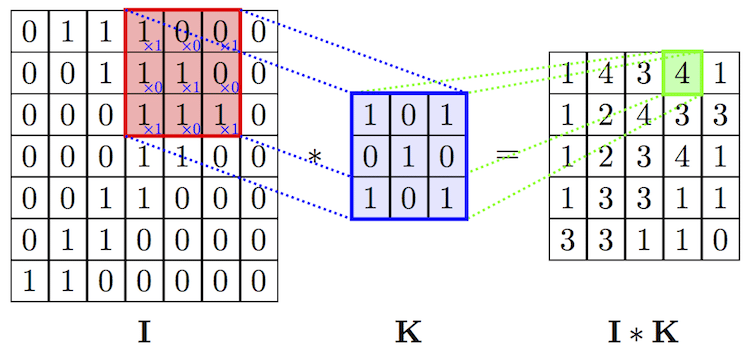
<br>
<br>

<p style='text-align: center;'>Convolution operation [by Ihab S. Mohamed, https://www.researchgate.net/figure/An-example-of-convolution-operation-in-2D-2_fig3_324165524]</p>


In [6]:
import torch
from torchsummary import summary
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torch.optim as optim
import time
import sklearn
import sklearn.metrics
from itertools import compress
import matplotlib.pyplot as plt
from typing import Dict
from dataclasses import dataclass
import argparse
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

##########################################################################################
# Arguments
##########################################################################################



model_output_file_prefix='output_imdb'
epochs=1
lr=0.001
batch_size=32
device='cpu'
weight_decay=0.0001
max_val_without_decrease=1000

###############################################################################
# Helper functions
###############################################################################

def generate_torch_data(input_data, selected_indices):
    input_data_tensor = torch.Tensor(np.array(input_data))
    return input_data_tensor[selected_indices]



C:\Users\93t\Anaconda3\envs\QNLP_IMDB_2\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
###############################################################################
# CNN model
###############################################################################

@dataclass
class Hparams:
    kernel1: int = 1
    kernel2: int = 1 
    kernel3: int = 1
    embed_dim: int = 10 #doc2vec embedding dimension
    n_filters: int = 300
    vocab_size: int = 1
    fixed_embeddings: bool = False



class Conv1dPool(nn.Module):
    """ Conv1d => AdaptiveMaxPool1d => Relu """

    def __init__(self, embedding_dim: int, n_filters: int, kernel_size: int):
        super(Conv1dPool, self).__init__()
        self.conv = nn.Conv1d(embedding_dim, n_filters, kernel_size)
        self._weight_init()

    def _weight_init(self):
        """ Initialize the convolution weights """
        gain = nn.init.calculate_gain('relu')
        nn.init.xavier_uniform_(self.conv.weight, gain)

    def forward(self, x):
        x = self.conv(x)
        x = F.adaptive_max_pool1d(x, output_size=1)
        x = F.relu(x)
        return x


class CNNModel(nn.Module):

    def __init__(self, numberOfClasses, hparams: Hparams, embeddings=None):
        super(CNNModel, self).__init__()
        self.hparams = hparams

        if (hparams.fixed_embeddings) and (embeddings is not None):
            self.embed = nn.Embedding.from_pretrained(embeddings, freeze=True)
        else:
            self.embed = nn.Linear(hparams.embed_dim,hparams.embed_dim)
            #self.embed = nn.Embedding(hparams.vocab_size, hparams.embed_dim, padding_idx=0)
            self._embed_init()

        self.conv1 = Conv1dPool(hparams.embed_dim, hparams.n_filters, hparams.kernel1)
        self.conv2 = Conv1dPool(hparams.embed_dim, hparams.n_filters, hparams.kernel2)
        self.conv3 = Conv1dPool(hparams.embed_dim, hparams.n_filters, hparams.kernel3)
        self.classifier = nn.Linear(self._filter_sum(), numberOfClasses)

    def _embed_init(self, initrange=0.05):
        """ Initialize the embedding weights """
        nn.init.uniform_(self.embed.weight, -initrange, initrange)

    def _filter_sum(self):
        return self.hparams.n_filters * 3

    def forward(self, x):
        x = self.embed(x)
        # Make sure embed_dim is the channel dim for convolution
        x = torch.reshape(x,(len(x),self.hparams.embed_dim,1))#x.transpose(1, 2)

        conv_results = []
        conv_results.append(self.conv1(x).view(-1, self.hparams.n_filters))
        conv_results.append(self.conv2(x).view(-1, self.hparams.n_filters))
        conv_results.append(self.conv3(x).view(-1, self.hparams.n_filters))
        x = torch.cat(conv_results, 1)

        logits = self.classifier(x)
        return logits


In [8]:

##########################################################################################
# Load Data
##########################################################################################

trainval, test = train_test_split(df, test_size=0.2)
train, val = train_test_split(trainval, test_size=0.2)

def extract_x_y(dff):
  x=np.stack(dff['doc2vec'].to_numpy())
  y=dff['sentiment'].to_numpy()
  return x,y

train_x, train_y = extract_x_y(train)

val_x, val_y = extract_x_y(val)

test_x, test_y = extract_x_y(test)

numberOfClasses = 2

filter_label_dict= {'negative': 0, 'positive': 1}

##########################################################################################
# Function Definitions
##########################################################################################

def correctPreds(output, labels):
    preds = output.max(1)[1].type_as(labels)
    correct = preds.eq(labels).double()
    correct = correct.sum()
    return correct.item()


##########################################################################################
# Model Setup
##########################################################################################

device = torch.device('cpu')
model = CNNModel(numberOfClasses, Hparams(vocab_size=10))

pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('Number of Trainable Parameters: ' + str(pytorch_total_params), flush=True)

model = model.to(device)

optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

loss_fcn = torch.nn.CrossEntropyLoss()

labels = torch.tensor(train_y, dtype=torch.long, device=device)

labelsVal = torch.tensor(val_y, dtype=torch.long, device=device)

labelsTest = torch.tensor(test_y, dtype=torch.long, device=device)

batch_size = batch_size



Number of Trainable Parameters: 11812


Epoch: 0
Train Acc: 15953/31999
Train Time: 6.404008150100708
Train Loss: 0.02173007697462123
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     15970
           1       0.50      0.50      0.50     16030

    accuracy                           0.50     32000
   macro avg       0.50      0.50      0.50     32000
weighted avg       0.50      0.50      0.50     32000

[[0.49924859 0.50075141]
 [0.50218341 0.49781659]]
plot saved
Val Acc: 3997/7999
Val Loss: 0.021676020229409704
New Validation Loss Minimum
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      4003
           1       0.50      1.00      0.67      3997

    accuracy                           0.50      8000
   macro avg       0.75      0.50      0.33      8000
weighted avg       0.75      0.50      0.33      8000

[[2.49812641e-04 9.99750187e-01]
 [0.00000000e+00 1.00000000e+00]]
Micro, Macro: 0.49975, 0.33344414838246117
Tr

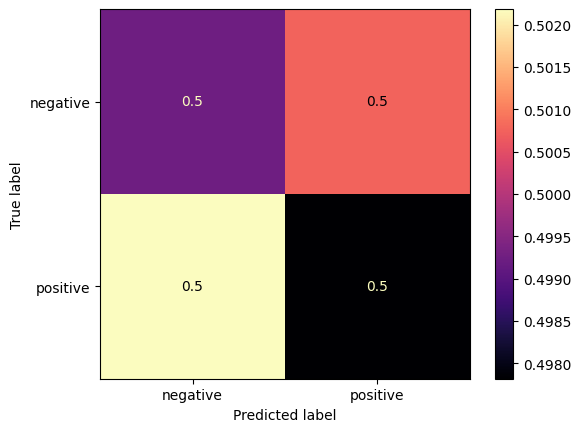

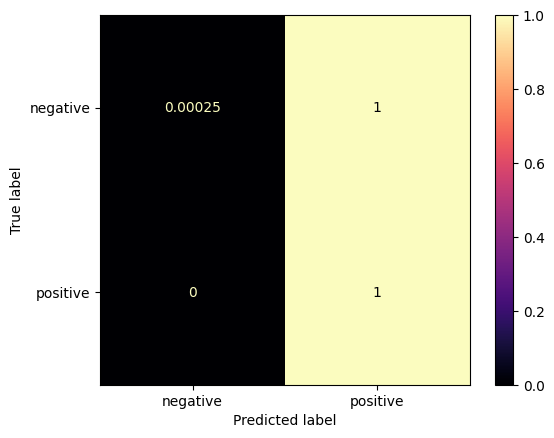

In [9]:
##########################################################################################
# Train the Model
##########################################################################################

minVal = np.PINF
minCounter = 0

model.train()
for i in range(epochs):

    if minCounter >= max_val_without_decrease:
        print('Stopped Training due to Validation Loss Not Decreasing', flush=True)
        break

    t = time.time()
    indicesForTraining = np.arange(len(train_x))
    permutation = torch.randperm(len(indicesForTraining))
    allClassPreds = np.zeros((len(train_x), 1))
    correctSum = 0.0
    totalSum = 0.0
    totalLoss = 0.0
    print('Epoch: ' + str(i), flush=True)
    for k in range(0, len(permutation), batch_size):
        start_index = k
        end_index = min(len(permutation) - 1, k + batch_size)
        indices = indicesForTraining[permutation[start_index:end_index]]
        if end_index == (start_index + 1):
            indices = [indices]
        trainBatch = generate_torch_data(train_x, indices)
        trainBatch = trainBatch.to(device)
        output = model(trainBatch)
        loss_train = loss_fcn(output, labels[indices])
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        allClassPreds[indices, 0] = np.argmax(output.detach().cpu(), axis=-1)
        correctSum += correctPreds(output.detach(), labels[indices])
        totalSum += len(indices)
        totalLoss += loss_train.item()
    print('Train Acc: ' + str(int(correctSum)) + '/' + str(int(totalSum)), flush=True)
    print('Train Time: ' + str(time.time() - t), flush=True)
    print('Train Loss: ' + str(totalLoss / totalSum), flush=True)
    print(sklearn.metrics.classification_report(labels.detach().cpu().numpy(), allClassPreds))
    cm = sklearn.metrics.confusion_matrix(labels.detach().cpu().numpy(), allClassPreds,normalize="true")
    print(cm)
    if(i==epochs-1):

      disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=filter_label_dict.keys())
      disp.plot(cmap="magma")
      plt.savefig("-" + 'vs'.join([str(x) for x in filter_label_dict.keys()]) + "-train" + ".png")
      print("plot saved")

    ##### Validation Set Evaluation


    model.eval()
    valCorrect = 0.0
    valTotal = 0.0
    totalLoss = 0.0
    allValClassPreds = np.zeros((len(val_x), 1))
    for k in range(0, len(val_x), batch_size):
        start_index = k
        end_index = min(len(val_x) - 1, k + batch_size)
        indices = np.arange(start_index, end_index)
        valBatch = generate_torch_data(val_x, indices)
        valBatch = valBatch.to(device)
        output = model(valBatch)
        loss_val = loss_fcn(output, labelsVal[indices])
        allValClassPreds[indices, 0] = np.argmax(output.detach().cpu(), axis=-1)
        valCorrect += correctPreds(output, labelsVal[indices])
        valTotal += len(indices)
        totalLoss += loss_val.item()
    print('Val Acc: ' + str(int(valCorrect)) + '/' + str(int(valTotal)), flush=True)
    print('Val Loss: ' + str(totalLoss / valTotal))

    if totalLoss < minVal:
        minVal = totalLoss
        minCounter = 0
        print('New Validation Loss Minimum', flush=True)
        if model_output_file_prefix is not None:
            torch.save({
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict()
            }, model_output_file_prefix + '_val_min.tar')
    else:
        minCounter += 1
        print('Epochs Since Validation Minimum Reached: ' + str(minCounter), flush=True)

    micro = sklearn.metrics.f1_score(labelsVal.detach().cpu().numpy(), allValClassPreds, average='micro')
    macro = sklearn.metrics.f1_score(labelsVal.detach().cpu().numpy(), allValClassPreds, average='macro')
    print(sklearn.metrics.classification_report(labelsVal.detach().cpu().numpy(), allValClassPreds))
    cm = sklearn.metrics.confusion_matrix(labelsVal.detach().cpu().numpy(), allValClassPreds,normalize="true")
    print(cm)

    if(i==epochs-1):
      disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=filter_label_dict.keys())
      disp.plot(cmap="magma")
      plt.savefig('-' + 'vs'.join([str(x) for x in filter_label_dict.keys()]) + "-val" + ".png")

    print('Micro, Macro: ' + str(micro) + ', ' + str(macro), flush=True)
    print("Training Accuracy")
    print(sklearn.metrics.accuracy_score(labels.detach().cpu().numpy(), allClassPreds))

    print("Validation Accuracy")
    print(sklearn.metrics.accuracy_score(labelsVal.detach().cpu().numpy(), allValClassPreds))
    model.train()
    print("summary")
    print(valBatch.size())

    model.train()



In [10]:
##########################################################################################
# Test the Model
##########################################################################################


model.eval()
testCorrect = 0.0
testTotal = 0.0

allTestClassPreds = np.zeros((len(test_x), 1))
for k in range(0, len(test_x), batch_size):
    start_index = k
    end_index = min(len(test_x), k + batch_size)
    indices = np.arange(start_index, end_index)
    testBatch = generate_torch_data(test_x, indices)
    testBatch = testBatch.to(device)
    output = model(testBatch)
    allTestClassPreds[indices, 0] = np.argmax(output.detach().cpu(), axis=-1)
    testCorrect += correctPreds(output.detach(), labelsTest[indices])
    testTotal += len(indices)

print('Test Acc: ' + str(int(testCorrect)) + '/' + str(int(testTotal)), flush=True)
micro = sklearn.metrics.f1_score(labelsTest.detach().cpu().numpy(), allTestClassPreds, average='micro')
macro = sklearn.metrics.f1_score(labelsTest.detach().cpu().numpy(), allTestClassPreds, average='macro')
print('Micro, Macro: ' + str(micro) + ', ' + str(macro), flush=True)
model.train()

##########################################################################################
# Save the Model
##########################################################################################

if model_output_file_prefix is not None:
    torch.save({
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict()
    }, model_output_file_prefix + '_epoch_final.tar')


Test Acc: 4973/10000
Micro, Macro: 0.4973, 0.3321311694383223




<b>References</b>

Magumba, M.A., Nabende, P. & Mwebaze, E. Ontology boosted deep learning for disease name extraction from Twitter messages. J Big Data 5, 31 (2018). https://doi.org/10.1186/s40537-018-0139-2

Text Features: https://knowledge.dataiku.com/latest/ml-analytics/nlp/concept-text-features-for-ml.html


Word Embedding: https://www.enjoyalgorithms.com/blog/word-vector-encoding-in-nlp


Convolution Neural Network: https://github.com/radoslawkrolikowski/sentiment-analysis-pytorch/blob/master/6_TextCNN.ipynb
